In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [8]:
df = pd.read_csv('Estuarine_Crocodile.csv')
df.head()

,Species,CommonName,HeadLength,BodyLength
0,Crocodylus porosus,Estuarine Crocodile,24,161
1,Crocodylus porosus,Estuarine Crocodile,24,179
2,Crocodylus porosus,Estuarine Crocodile,32,226
3,Crocodylus porosus,Estuarine Crocodile,35,259
4,Crocodylus porosus,Estuarine Crocodile,40,287


In [14]:
#correlation
df.corr()

,HeadLength,BodyLength
HeadLength,1.000000,0.989891
BodyLength,0.989891,1.000000


In [13]:
df['BodyLength'].corr(df['HeadLength'])

0.9898911439276338

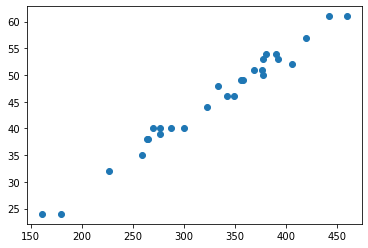

In [115]:
plt.scatter(x=df['BodyLength'], y=df['HeadLength'])
plt.show()

(-100.0, 1000.0)

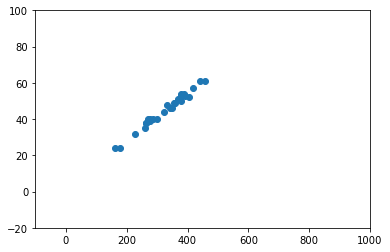

In [26]:
plt.scatter(x=df['BodyLength'], y=df['HeadLength'])
plt.ylim([-20, 100])
plt.xlim([-100, 1000])

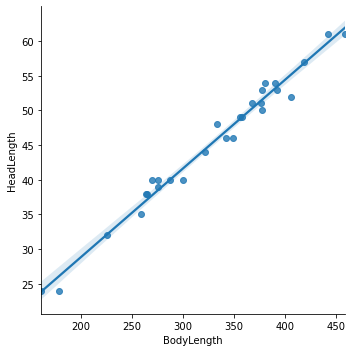

In [16]:
#plotting regression line:
sns.lmplot(data=df, x= 'BodyLength', y='HeadLength')

### Linear Regression

In [33]:
#regression line:
Y= df['BodyLength'] 
X=df['HeadLength']
X=sm.add_constant(X)
model=sm.OLS(Y, X)
print(model)

In [36]:
results = model.fit()
print(results)


In [38]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BodyLength   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     1267.
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           1.38e-23
Time:                        11:46:29   Log-Likelihood:                -105.32
No. Observations:                  28   AIC:                             214.6
Df Residuals:                      26   BIC:                             217.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.2740      9.966     -1.834      0.078     -38.760       2.212
HeadLength     7.6601      0.215     35.588      0.000       7.218       8.103
==============================================================================
Omnibus:                        0.667   Durbin-Watson:                   2.342
Prob(Omnibus):                  0.716   Jarque-Bera (JB):                0.597
Skew:                           0.323   Prob(JB):                        0.742
Kurtosis:                       2.693   Cond. No.                         226.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
Y_pred = results.predict(X)

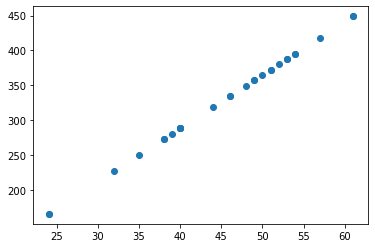

In [57]:
plt.plot(X['HeadLength'], Y_pred, 'o')

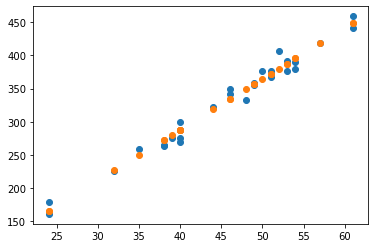

In [59]:
plt.plot(X['HeadLength'], Y, 'o')
plt.plot(X['HeadLength'], Y_pred, 'o')

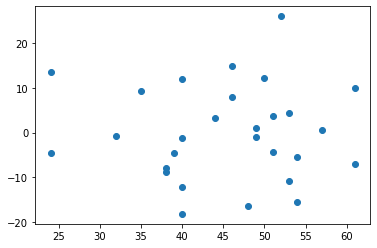

In [60]:
plt.plot(X['HeadLength'], residuals, 'o')
#the average of residuals is zero

In [48]:
residuals = Y - Y_pred
residuals

0     -4.568483
1     13.431517
2     -0.849320
3      9.170366
4     -1.130157
5     11.869843
6      7.909215
7    -16.410995
8     25.948587
9     10.007645
10     3.608691
11   -15.371623
12    -7.809948
13    14.909215
14    -8.809948
15     0.928901
16    -4.470053
17    -1.071099
18   -18.130157
19     4.288482
20    -6.992355
21   -10.711518
22     3.229424
23    -5.371623
24    12.268796
25     0.648063
26   -12.130157
27    -4.391309
dtype: float64

In [50]:
mse= np.mean(residuals**2)
mse

108.3283270759337

In [55]:
rmse = np.sqrt(mse)
rmse

10.408089501725746

### Multivariate regression

In [88]:
data=pd.read_csv('fitbit2.csv')
#data.head()

### 1. correlation matrix
### 2. scatterplot MinutesOfBeingAwake versus NumberOfAwakings
### 3. regression with statsmodels: [MinutesOfBeingAwake] = b0 + b1*[NumberOfAwakings]

In [87]:
#data.corr()

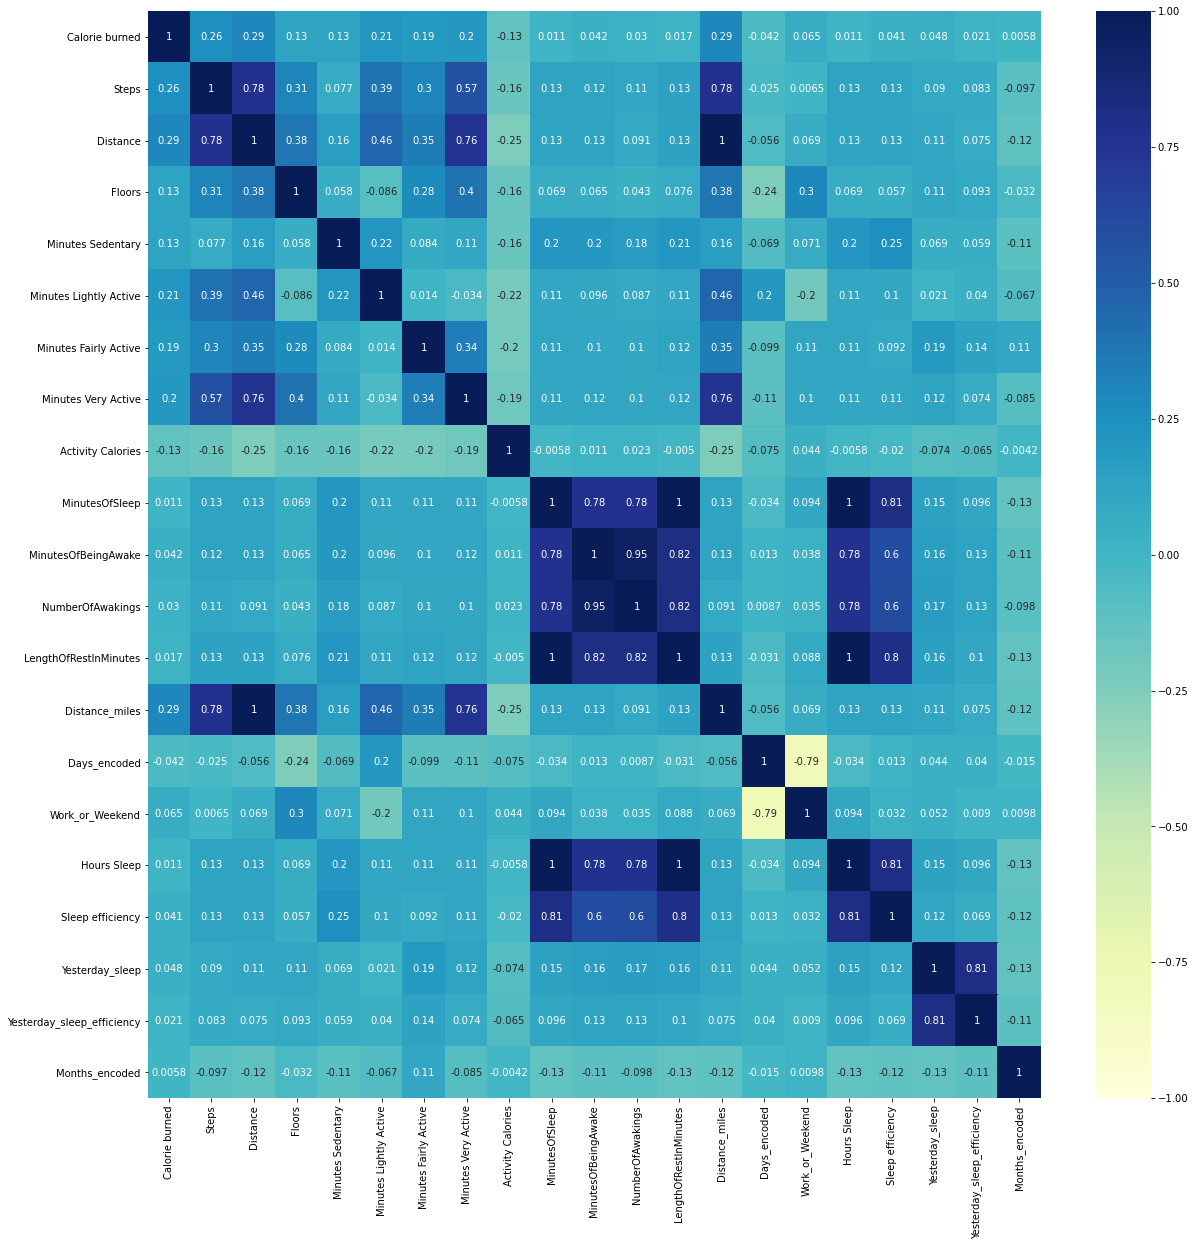

In [95]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap='YlGnBu', annot=True)
plt.show()

In [96]:
X=data['NumberOfAwakings']
Y=data['MinutesOfBeingAwake']
X = sm.add_constant(X) # add constant
model = sm.OLS(Y, X)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.906
Model:                             OLS   Adj. R-squared:                  0.906
Method:                  Least Squares   F-statistic:                     3516.
Date:                 Sat, 07 Nov 2020   Prob (F-statistic):          1.89e-189
Time:                         12:53:26   Log-Likelihood:                -1158.1
No. Observations:                  367   AIC:                             2320.
Df Residuals:                      365   BIC:                             2328.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.4381      0.538      2.675      0.008       0.381       2.495
NumberOfAwakings     1.6405      0.028     59.297      0.000       1.586       1.695
==============================================================================
Omnibus:                       17.535   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.142
Skew:                           0.290   Prob(JB):                     1.73e-07
Kurtosis:                       4.304   Cond. No.                         35.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
Y_pre = results.predict(X)
residuals1 = Y - Y_pre
residuals1

0     -13.169929
1      -0.888900
2       3.549043
3      -4.888900
4      -8.620726
         ...    
362     2.032642
363     6.437783
364     8.954184
365     4.470585
366     4.705958
Length: 367, dtype: float64

In [104]:
mse= np.mean(residuals1**2)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

32.242984271038715
5.6782906117104215


In [123]:
#here is multivariate regression:
X=data[['NumberOfAwakings', 'Distance_miles', 'MinutesOfSleep']]
Y=data['MinutesOfBeingAwake']
X = sm.add_constant(X) # add constant
model = sm.OLS(Y, X)

In [124]:
results1=model.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.911
Model:                             OLS   Adj. R-squared:                  0.910
Method:                  Least Squares   F-statistic:                     1237.
Date:                 Sat, 07 Nov 2020   Prob (F-statistic):          3.76e-190
Time:                         14:39:31   Log-Likelihood:                -1148.2
No. Observations:                  367   AIC:                             2304.
Df Residuals:                      363   BIC:                             2320.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.4188      0.907     -1.565      0.119      -3.202       0.365
NumberOfAwakings     1.5159      0.043     35.088      0.000       1.431       1.601
Distance_miles       0.3406      0.138      2.463      0.014       0.069       0.613
MinutesOfSleep       0.0106      0.003      3.499      0.001       0.005       0.016
==============================================================================
Omnibus:                       18.325   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.898
Skew:                           0.278   Prob(JB):                     2.64e-08
Kurtosis:                       4.404   Cond. No.                     1.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [125]:
Y_pred2 = results1.predict(X)
residuals2 = Y - Y_pred2

mse= np.mean(residuals2**2)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

30.551268344257988
5.527320177469186


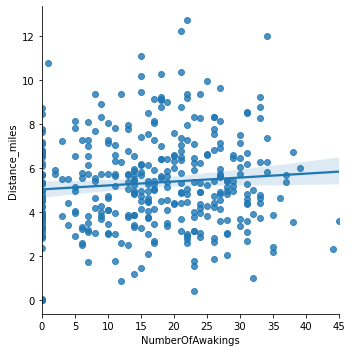

In [126]:
sns.lmplot(data=data, x= 'NumberOfAwakings', y='Distance_miles')

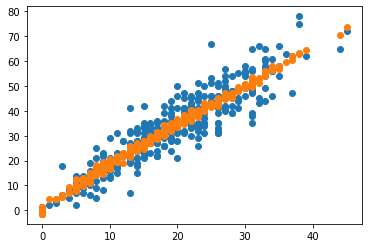

In [131]:
plt.plot(X['NumberOfAwakings'], Y, 'o')
plt.plot(X['NumberOfAwakings'], Y_pred2, 'o')